In [ ]:
pip install sysidentpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
# pip install sysidentpy==0.1.6

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Sample_Data.xlsx to Sample_Data.xlsx


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sysidentpy.model_structure_selection import FROLS
from sysidentpy.basis_function._basis_function import Polynomial
from sysidentpy.metrics import root_relative_squared_error
from sysidentpy.utils.display_results import results
from sysidentpy.utils.plotting import plot_residues_correlation, plot_results
from sysidentpy.residues.residues_correlation import compute_residues_autocorrelation, compute_cross_correlation
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

In [ ]:
%matplotlib inline
var=pd.read_excel('Sample_Data.xlsx', skiprows=[0, 2]) 
input_var=var.iloc[:, 1:13]
output_var=var.iloc[:, 13]
df=pd.DataFrame(input_var)
x = df.to_numpy()

df1=pd.DataFrame(output_var)
S= df1.to_numpy()

x_train, x_valid, y_train, y_valid = train_test_split(x,S,train_size=0.85,shuffle= False)

var.head(24)

,Date,Bitcoin,Ethereum,Tether,BNB,USD coin,XRP,ADA,MIOTA-USD,BITG-USD,XNO-USD,POWR-USD,WPR-USD,Global Carbon Emissions
0,2019-01-01,3843.520020,140.819412,1.018335,6.075273,1.013301,0.364771,0.042547,0.369184,0.565172,0.957399,0.081141,0.012979,1.380118
1,2019-01-02,3943.409424,155.047684,1.024012,6.188613,1.018173,0.375243,0.045258,0.394705,0.601809,0.967005,0.081115,0.013383,1.375906
2,2019-01-03,3836.741211,149.135010,1.019473,5.903535,1.013577,0.360224,0.042682,0.379233,0.576665,0.923639,0.081674,0.013229,1.362204
3,2019-01-04,3857.717529,154.581940,1.017200,6.065138,1.008160,0.356747,0.043812,0.377061,0.524780,0.934506,0.082921,0.013222,1.384414
4,2019-01-05,3845.194580,155.638596,1.018489,6.065543,1.011010,0.355275,0.044701,0.369546,0.494481,0.938311,0.083323,0.013252,1.369434
5,2019-01-06,4076.632568,157.746201,1.023578,6.395979,1.010108,0.368395,0.049261,0.380924,0.519953,1.012357,0.086328,0.014259,1.350815
6,2019-01-07,4025.248291,151.699219,1.013987,6.291411,1.005358,0.364347,0.047996,0.367764,0.494860,0.960877,0.083340,0.013675,1.367063
7,2019-01-08,4030.847900,150.359634,1.019350,6.640054,1.007918,0.365315,0.048525,0.363091,0.467870,0.996817,0.082111,0.013758,1.390842
8,2019-01-09,4035.296387,150.803116,1.016830,6.641550,1.002264,0.370890,0.052169,0.369409,0.414276,1.043405,0.082755,0.013826,1.407074
9,2019-01-10,3678.924561,128.625183,1.023460,5.915919,1.013104,0.332652,0.044529,0.312712,0.384255,0.891327,0.071019,0.011963,1.419752


In [ ]:
var.tail(5)

,Date,Bitcoin,Ethereum,Tether,BNB,USD coin,XRP,ADA,MIOTA-USD,BITG-USD,XNO-USD,POWR-USD,WPR-USD,Global Carbon Emissions
1546,2023-03-27,27139.88867,1715.460815,1.000233,310.949127,0.999684,0.479991,0.345510,0.199773,0.015964,0.864513,0.172223,0.000365,1.292642
1547,2023-03-28,27268.13086,1772.785645,1.000307,313.260620,0.999884,0.515058,0.368354,0.204213,0.017457,0.870248,0.176723,0.000243,1.287502
1548,2023-03-29,28348.44141,1793.001831,0.999989,313.841766,0.999811,0.543577,0.381589,0.215476,0.012048,0.887597,0.182595,0.000365,1.276639
1549,2023-03-30,28033.56250,1792.737183,1.000093,316.567566,1.000009,0.534249,0.376459,0.211155,0.016241,0.877167,0.188632,0.000365,1.275667
1550,2023-03-31,28478.48438,1822.022095,1.000124,317.040009,0.999784,0.538492,0.398923,0.216953,0.016409,0.885557,0.195867,0.000365,1.242010


In [ ]:
input_var


,Bitcoin,Ethereum,Tether,BNB,USD coin,XRP,ADA,MIOTA-USD,BITG-USD,XNO-USD,POWR-USD,WPR-USD
0,3843.520020,140.819412,1.018335,6.075273,1.013301,0.364771,0.042547,0.369184,0.565172,0.957399,0.081141,0.012979
1,3943.409424,155.047684,1.024012,6.188613,1.018173,0.375243,0.045258,0.394705,0.601809,0.967005,0.081115,0.013383
2,3836.741211,149.135010,1.019473,5.903535,1.013577,0.360224,0.042682,0.379233,0.576665,0.923639,0.081674,0.013229
3,3857.717529,154.581940,1.017200,6.065138,1.008160,0.356747,0.043812,0.377061,0.524780,0.934506,0.082921,0.013222
4,3845.194580,155.638596,1.018489,6.065543,1.011010,0.355275,0.044701,0.369546,0.494481,0.938311,0.083323,0.013252
...,...,...,...,...,...,...,...,...,...,...,...,...
1546,27139.888670,1715.460815,1.000233,310.949127,0.999684,0.479991,0.345510,0.199773,0.015964,0.864513,0.172223,0.000365
1547,27268.130860,1772.785645,1.000307,313.260620,0.999884,0.515058,0.368354,0.204213,0.017457,0.870248,0.176723,0.000243
1548,28348.441410,1793.001831,0.999989,313.841766,0.999811,0.543577,0.381589,0.215476,0.012048,0.887597,0.182595,0.000365
1549,28033.562500,1792.737183,1.000093,316.567566,1.000009,0.534249,0.376459,0.211155,0.016241,0.877167,0.188632,0.000365


In [ ]:
output_var

0       1.380118
1       1.375906
2       1.362204
3       1.384414
4       1.369434
          ...   
1546    1.292642
1547    1.287502
1548    1.276639
1549    1.275667
1550    1.242010
Name: Global Carbon Emissions, Length: 1551, dtype: float64

In [ ]:
x_valid

array([[2.39575293e+04, 1.88122412e+03, 1.00040600e+00, ...,
        1.08968300e+00, 2.70195000e-01, 7.53000000e-04],
       [2.44028184e+04, 1.95724646e+03, 1.00033600e+00, ...,
        1.10900500e+00, 2.78004000e-01, 6.28000000e-04],
       [2.44240684e+04, 1.98133655e+03, 1.00037600e+00, ...,
        1.09348500e+00, 2.73738000e-01, 7.54000000e-04],
       ...,
       [2.83484414e+04, 1.79300183e+03, 9.99989000e-01, ...,
        8.87597000e-01, 1.82595000e-01, 3.65000000e-04],
       [2.80335625e+04, 1.79273718e+03, 1.00009300e+00, ...,
        8.77167000e-01, 1.88632000e-01, 3.65000000e-04],
       [2.84784844e+04, 1.82202210e+03, 1.00012400e+00, ...,
        8.85557000e-01, 1.95867000e-01, 3.65000000e-04]])

In [ ]:
len(x_valid)

233

In [ ]:
len(x_train)

1318

In [ ]:
y_valid

array([[1.28319873],
       [1.30007504],
       [1.29151733],
       [1.27770809],
       [1.28733201],
       [1.3045455 ],
       [1.31469565],
       [1.30948561],
       [1.29885908],
       [1.26514623],
       [1.2458795 ],
       [1.27983227],
       [1.27809542],
       [1.28268382],
       [1.28857094],
       [1.27533356],
       [1.25169385],
       [1.21751573],
       [1.24752529],
       [1.26635134],
       [1.24935707],
       [1.20946835],
       [1.19781054],
       [1.17260969],
       [1.15881303],
       [1.18479686],
       [1.19796963],
       [1.22039609],
       [1.2305831 ],
       [1.24057134],
       [1.19581757],
       [1.14919619],
       [1.18333579],
       [1.18846451],
       [1.18660228],
       [1.17786829],
       [1.17659524],
       [1.16872867],
       [1.1437451 ],
       [1.16901796],
       [1.18249255],
       [1.16256924],
       [1.14756868],
       [1.14528906],
       [1.13375175],
       [1.11839006],
       [1.17122251],
       [1.182

In [ ]:
len(y_valid)

233

In [ ]:
len(x_train)

1318

In [ ]:
basis_function = Polynomial(degree=3)

model = FROLS(
    order_selection=True,
    n_terms=20,
    extended_least_squares=False,
    ylag=12,
    xlag=[[1, 12], [1, 12],[1, 12], [1, 12],[1, 12], [1, 12],[1, 12], [1, 12],[1, 12], [1, 12],[1, 12], [1, 12]],
    info_criteria='aic',
    estimator='least_squares',
    basis_function=basis_function
)

/usr/local/lib/python3.10/dist-packages/sysidentpy/utils/deprecation.py:37: FutureWarning:

Passing a string to define the estimator will rise an error in v0.4.0. 
 You'll have to use FROLS(estimator=LeastSquares()) instead. 
 The only change is that you'll have to define the estimator first instead of passing a string like 'least_squares'. 
 This change will make easier to implement new estimators and it'll improve code readability.



In [ ]:
model.fit(X=x_train, y=y_train)

In [ ]:
yhat = model.predict(X=x, y=S)
rrse = root_relative_squared_error(S, yhat)
print(rrse)

r = pd.DataFrame(
    results(
        model.final_model, model.theta, model.err,
        model.n_terms, err_precision=8, dtype='sci'
        ),
    columns=['Regressors', 'Parameters', 'ERR'])
print(r)


0.8520881828104485
                   Regressors   Parameters             ERR
0                      y(k-1)   8.5223E-01  9.99457749E-01
1                      y(k-7)   7.7957E-01  3.33579172E-05
2                      y(k-8)  -6.5801E-01  1.54776040E-04
3            x3(k-12)^2y(k-2)  -8.6990E-02  5.62891163E-06
4              x3(k-12)y(k-9)   1.1734E-01  8.59942689E-06
5              y(k-7)y(k-5)^2  -9.7563E-02  2.74826289E-06
6          y(k-5)y(k-4)y(k-1)   1.5689E-01  4.09546389E-06
7              y(k-4)^2y(k-2)  -6.1705E-02  1.56358213E-06
8     x12(k-1)x9(k-12)x6(k-1)  -1.5011E+00  8.82868803E-07
9     x11(k-1)x8(k-12)x8(k-1)   7.4587E-03  9.08475784E-07
10  x11(k-12)x11(k-1)x6(k-12)  -1.8834E-01  1.40170264E-06
11    x11(k-1)x8(k-12)x4(k-1)   1.2679E-04  9.26305618E-07
12           x6(k-1)^2x4(k-1)  -5.7021E-05  9.87082263E-07
13             x6(k-1)y(k-12)   2.5122E-02  8.97208835E-07
14            x8(k-1)y(k-1)^2  -2.2550E-02  1.41250445E-06
15       x8(k-1)x4(k-1)y(k-9)   1.439

In [ ]:
len(yhat)


1551

In [ ]:
r["ERR"] = pd.to_numeric(r["ERR"], downcast="float") 
    
print('Sum of ERR=  ',r['ERR'].sum())            
    ####converting ERR column into float

# ee, ex, extras, lam = model.residuals(x, Y, yhat)
# model.plot_result(y, yhat, ee, ex)
# print(results)

Sum of ERR=   0.99968255


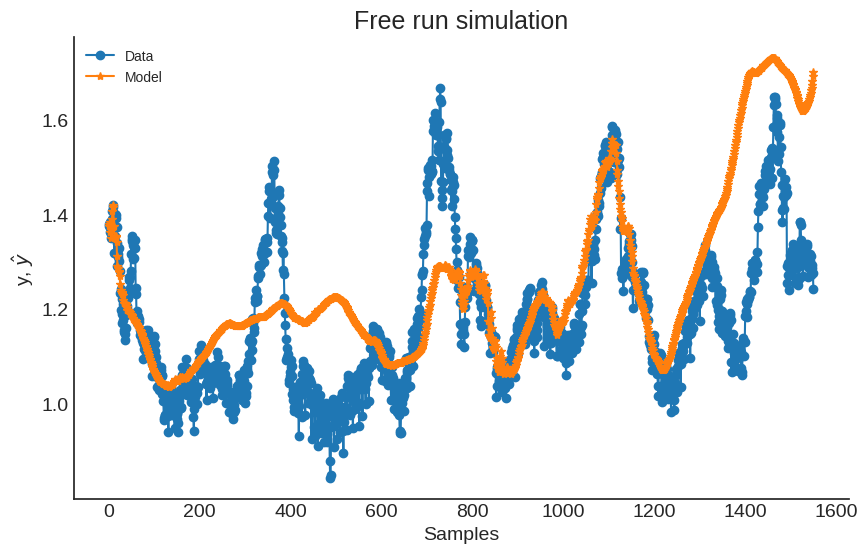

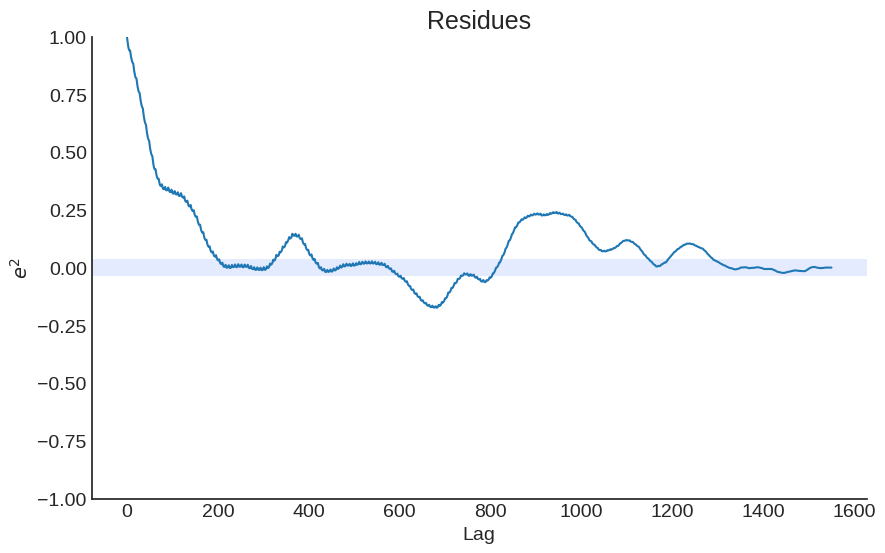

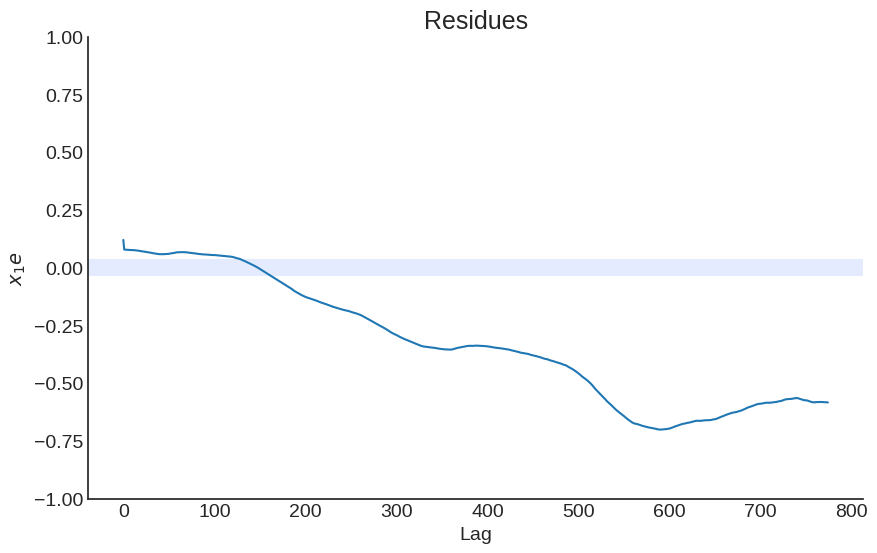

In [ ]:
plot_results(y=S, yhat = yhat, n=2000)
ee = compute_residues_autocorrelation(S, yhat)
plot_residues_correlation(data=ee, title="Residues", ylabel="$e^2$")
x1e = compute_cross_correlation(S, yhat, x[:, 0])
plot_residues_correlation(data=x1e, title="Residues", ylabel="$x_1e$")

In [ ]:

# t1=np.linspace(1, 24, num=24)
# t1
t2 = var['Date'][1318:1551]
t2
# len(t2)

1318   2022-08-11
1319   2022-08-12
1320   2022-08-13
1321   2022-08-14
1322   2022-08-15
          ...    
1546   2023-03-27
1547   2023-03-28
1548   2023-03-29
1549   2023-03-30
1550   2023-03-31
Name: Date, Length: 233, dtype: datetime64[ns]

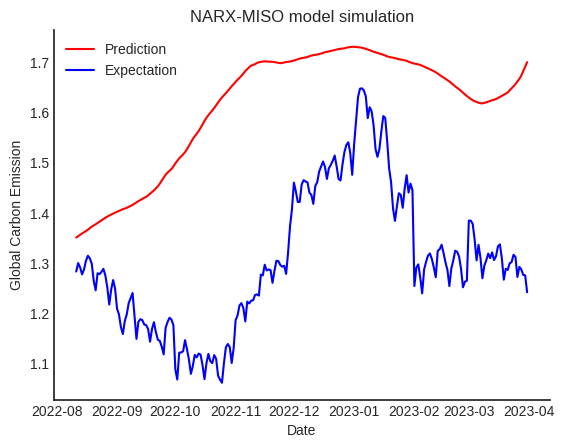

In [ ]:
plt.plot(t2, yhat[1318:1551], label = "Prediction", color='red')

# plotting the line 2 points 
plt.plot(t2, S[1318:1551], label = "Expectation", color='blue')
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('Global Carbon Emission')
# Set a title of the current axes.
plt.title('NARX-MISO model simulation')
# show a legend on the plot
plt.legend()
plt.savefig('MISO_fw.png')

In [ ]:
len(yhat)

1551

In [ ]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [ ]:
rmse(yhat[1318:1551], S[1318:1551])

0.3306577214282555

In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(S[1318:1551], yhat[1318:1551], squared=False)
rms

0.3306577214282555

In [ ]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(S[1318:1551], yhat[1318:1551])
mae

0.3071872472409763

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(S[1318:1551], yhat[1318:1551])
mape

0.24392711087843366

In [ ]:
from numpy import savetxt

In [ ]:
savetxt('yhat.csv', yhat, delimiter=',')

In [ ]:
r.to_csv('Model_Structure.csv')

In [ ]:
df1 = pd.DataFrame(S[1318:1551], columns=['Expectation-O/P'])
df1

,Expectation-O/P
0,1.283199
1,1.300075
2,1.291517
3,1.277708
4,1.287332
...,...
228,1.292642
229,1.287502
230,1.276639
231,1.275667


In [ ]:
df1['Prediction-O/P'] = yhat[1318:1551]
df1

,Expectation-O/P,Prediction-O/P
0,1.283199,1.350974
1,1.300075,1.353702
2,1.291517,1.356330
3,1.277708,1.358902
4,1.287332,1.361480
...,...,...
228,1.292642,1.666622
229,1.287502,1.673265
230,1.276639,1.681936
231,1.275667,1.690981


In [ ]:
# df1['Day'] = t1.astype('int')
# df1
# df1['Date'] = t2.astype('DATE')
# df1
# df1['Date'] = var['Date'][1318:1551]
# df1

In [ ]:
len(df1)
df1.columns

Index(['Expectation-O/P', 'Prediction-O/P'], dtype='object')

In [ ]:
# imports
import plotly.express as px 
import pandas as pd 
import numpy as np 

# data
fig = px.line(df1, x=var ['Date'][1318:1551], y= df1.columns[0:2],labels=dict(value="Total Global Emission"),title="NARX-MISO model simulation")

# Show plot 
fig.show()

In [ ]:
import plotly.graph_objects as go

fig2 = go.Figure()
fig2.add_trace(go.Scatter(x= var['Date'][1318:1551], y=df1["Expectation-O/P"], name="Expectation", mode="lines"))
fig2.add_trace(go.Scatter(x= var['Date'][1318:1551], y=df1["Prediction-O/P"], name="Prediction", mode="lines"))
fig2.update_layout(
    title="NARX-MISO model simulation", xaxis_title="Year", yaxis_title="Total Global Emission"
)
fig2.show()